Effect size: 0.5078885120696841
Sample size/Number needed in each group: 61.831
Power: 0.977
Confidence interval for Transition from saccade to fixaton for ASD participant: [5.293, 5.443]
Confidence interval for Transition from saccade to fixation for TD participant: [5.303, 5.433]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


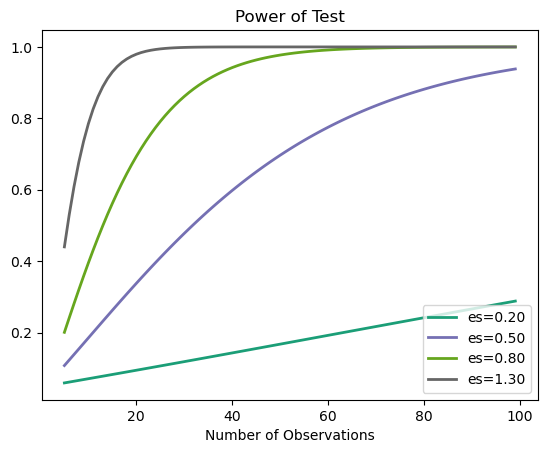

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower
from scipy.stats import t


# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD parameters.xlsx')
td_data = pd.read_excel('TD parameters.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd_s2f= asd_data['Transition rate from saccade to fixation']
td_s2f=td_data['Transition rate from saccade to fixation']


#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd_s2f.mean()
asd_std = asd_s2f.std()
td_mean = td_s2f.mean()
td_std = td_s2f.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))



power = TTestPower()
n_test = power.solve_power(nobs=62, effect_size = 0.51,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))




# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from saccade to fixaton for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from saccade to fixation for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')


# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()



Effect size: 0.6612555499244384
Sample size/Number needed in each group: 36.886
Power: 0.974
Confidence interval for Transition from fixation to saccade for ASD participant: [6.787, 6.926]
Confidence interval for Transition from fixation to saccade for TD participant: [6.797, 6.916]


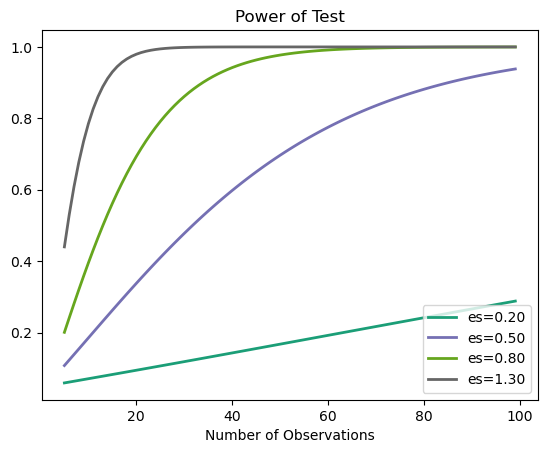

In [2]:
asd= asd_data['Transition rate from fixation to saccade']
td=td_data['Transition rate from fixation to saccade']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (td_mean-asd_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=37, effect_size = 0.66,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from fixation to saccade for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Transition from fixation to saccade for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()





Effect size: 0.7079626205820948
Sample size/Number needed in each group: 32.309
Power: 0.977
Confidence interval for Fixation velocities mean for ASD participant: [6.054, 6.215]
Confidence interval for Fixation velocities mean for TD participant: [6.065, 6.204]


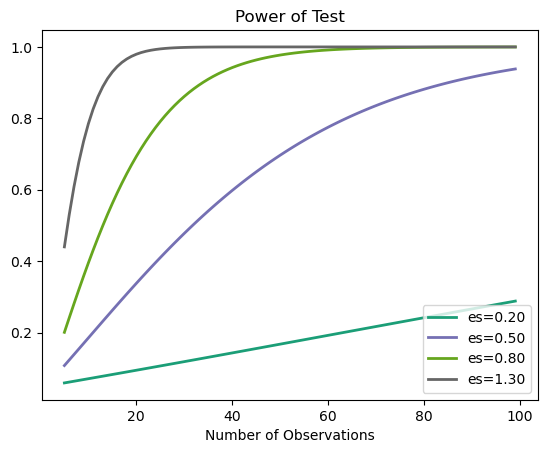

In [3]:
asd= asd_data['Fixation velocities mean']
td=td_data['Fixation velocities mean']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=33, effect_size = 0.71,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities mean for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities mean for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Effect size: 0.4762261385314487
Sample size/Number needed in each group: 70.190
Power: 0.979
Confidence interval for Fixation velocities standard deviation for ASD participant: [1.266, 1.385]
Confidence interval for Fixation velocities standard deviation for TD participant: [1.275, 1.376]


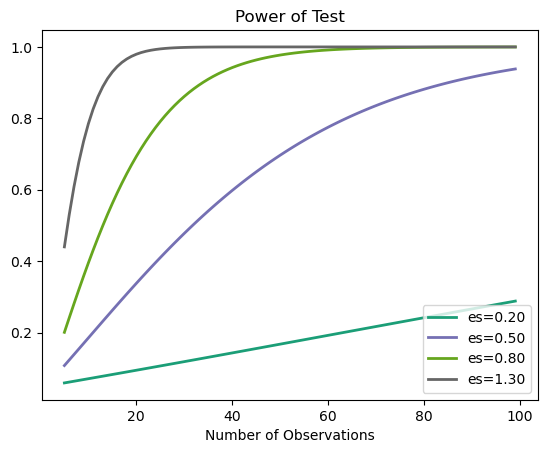

In [4]:
asd= asd_data['Fixation velocities standard deviation']
td=td_data['Fixation velocities standard deviation']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=71, effect_size = 0.48,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities standard deviation for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Fixation velocities standard deviation for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Effect size: 0.1449289521201346
Sample size/Number needed in each group: 748.315
Power: 0.436
Confidence interval for Saccade velocities mean for ASD participant: [8.500, 8.583]
Confidence interval for Saccade velocities mean for TD participant: [8.506, 8.577]


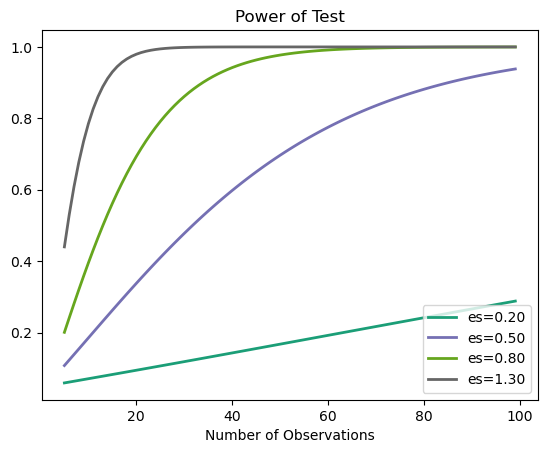

In [5]:
asd= asd_data['Saccade velocities mean']
td=td_data['Saccade velocities mean']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=167, effect_size = 0.14,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities mean for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities mean for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Effect size: -0.20781272890996685
Sample size/Number needed in each group: 364.453
Power: 0.729
Confidence interval for Saccade velocities standard deviation for ASD participant: [1.326, 1.416]
Confidence interval for Saccade velocities standard deviation for TD participant: [1.333, 1.410]


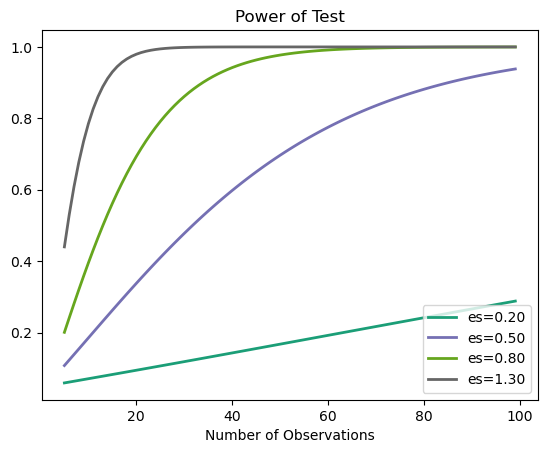

In [6]:
asd= asd_data['Saccade velocities standard deviation']
td=td_data['Saccade velocities standard deviation']

#calculation of effect size
# size of samples in each groups
n1, n2 = 167, 226
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=167, effect_size = 0.2,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))

# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities standard deviation for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Saccade velocities standard deviation for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

Specificity :  0.9705882352941176
Sensitivity :  0.5111111111111111


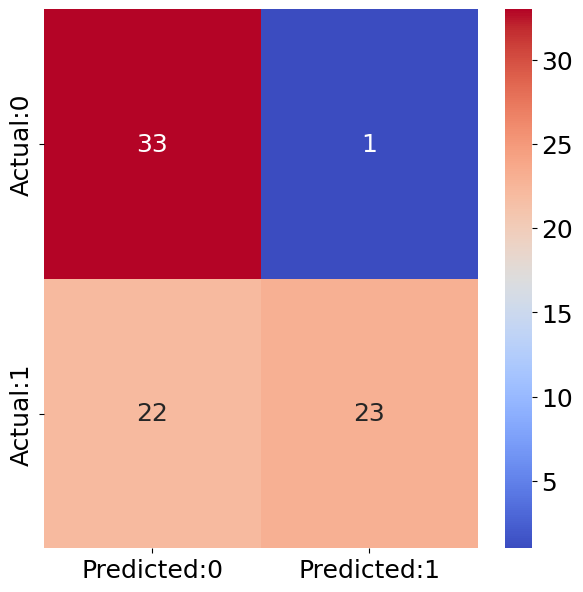

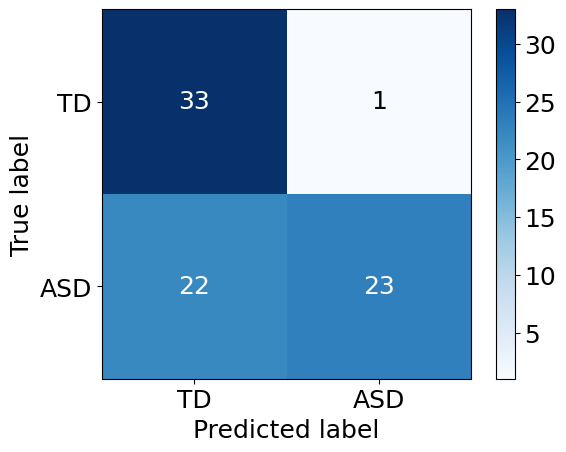

              precision    recall  f1-score   support

           0       0.60      0.97      0.74        34
           1       0.96      0.51      0.67        45

    accuracy                           0.71        79
   macro avg       0.78      0.74      0.70        79
weighted avg       0.80      0.71      0.70        79



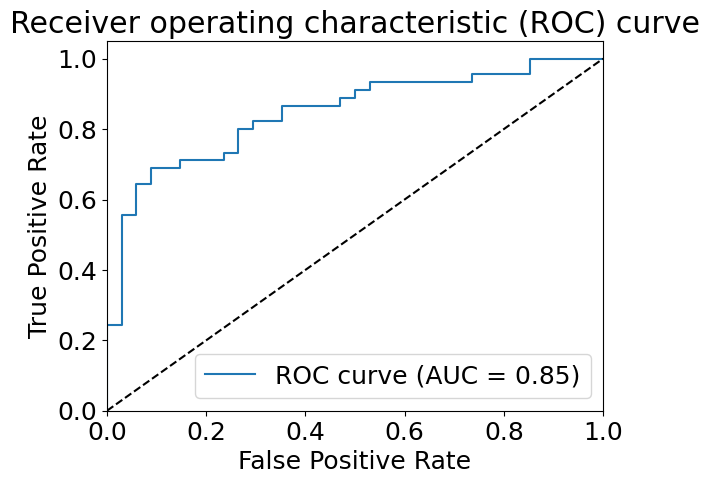

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve

# Load the data from the Excel files
asd_df = pd.read_excel('ASD parameters.xlsx')
td_df = pd.read_excel('TD parameters.xlsx')

# Select the four relevant features and combine the ASD and TD data
features = ["Transition rate from saccade to fixation", "Transition rate from fixation to saccade", "Fixation velocities mean", "Fixation velocities standard deviation"]
asd_data = asd_df[features]
td_data = td_df[features]
X = pd.concat([asd_data, td_data], axis=0)

# Create the target variable (ASD = 1, TD = 0)
y = [1]*asd_data.shape[0] + [0]*td_data.shape[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data and evaluate the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

# Visualize the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0,1], yticks=[0,1], xlabel='Predicted label', ylabel='True label')
ax.set_xticklabels(['TD', 'ASD'])
ax.set_yticklabels(['TD', 'ASD'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()




Fitting 5 folds for each of 28 candidates, totalling 140 fits
Hyperparameters : {'C': 1.0, 'penalty': 'none'}
Specificity :  0.9705882352941176
Sensitivity :  0.5777777777777777


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
70 fits failed out of a total of 140.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/maryamlotfigolia

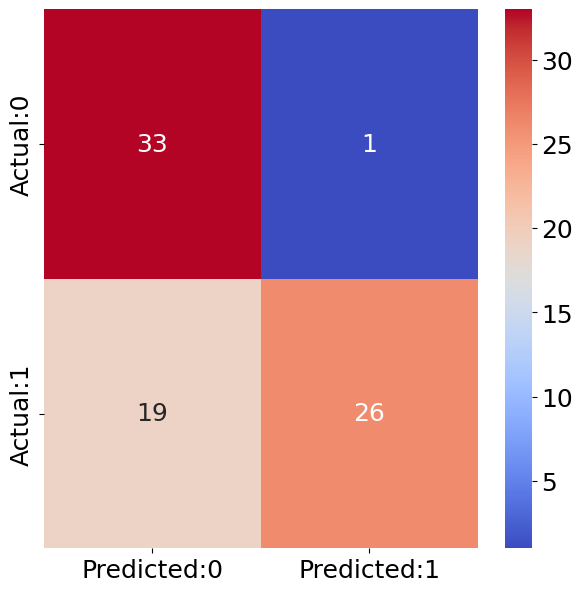

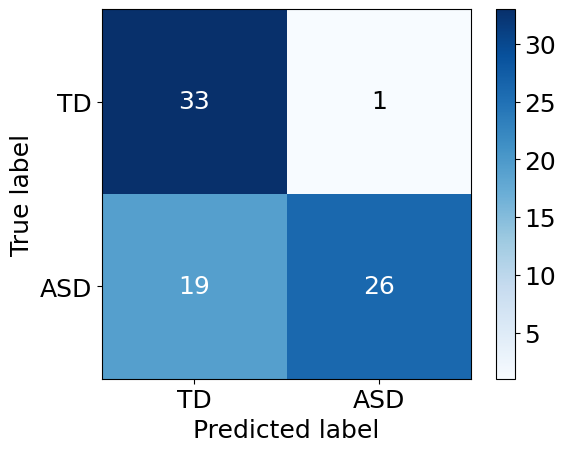

              precision    recall  f1-score   support

           0       0.63      0.97      0.77        34
           1       0.96      0.58      0.72        45

    accuracy                           0.75        79
   macro avg       0.80      0.77      0.74        79
weighted avg       0.82      0.75      0.74        79



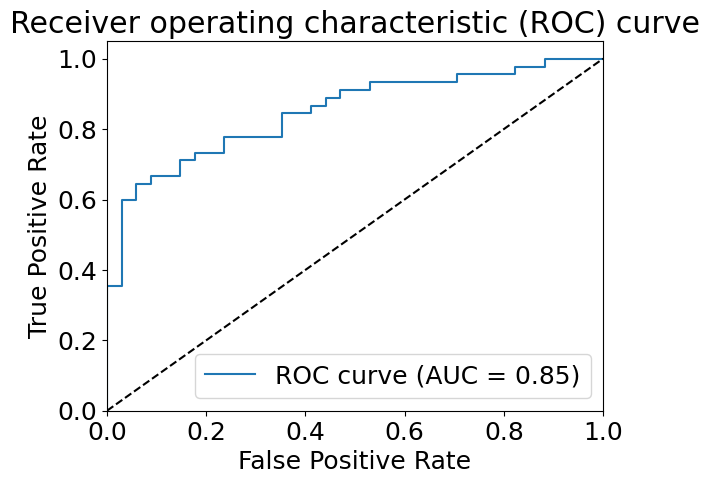

In [147]:
from sklearn.model_selection import GridSearchCV

parameters = {'penalty': ('l1', 'l2','elasticnet', 'none'),
    'C': (1.0, 0.75, 0.5, 0.25, 0.1, 1.25, 1.5)}

logreg= LogisticRegression()
logreg_optimized = GridSearchCV(logreg, param_grid=parameters, n_jobs=-1, verbose=True, cv=5, scoring = 'recall')
logreg_optimized.fit(X_train, y_train)
print("Hyperparameters :", logreg_optimized.best_params_)
# Make predictions on the testing data and evaluate the model
y_pred = logreg_optimized .predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

# Visualize the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0,1], yticks=[0,1], xlabel='Predicted label', ylabel='True label')
ax.set_xticklabels(['TD', 'ASD'])
ax.set_yticklabels(['TD', 'ASD'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_optimized .predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, logreg_optimized.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

Effect size: 0.3630977429609754
Sample size/Number needed in each group: 120.034
Power: 0.331
Confidence interval for Std_X_Position for ASD participant: [238.166, 255.083]
Confidence interval for Std_X_Position for TD participant: [239.613, 253.636]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


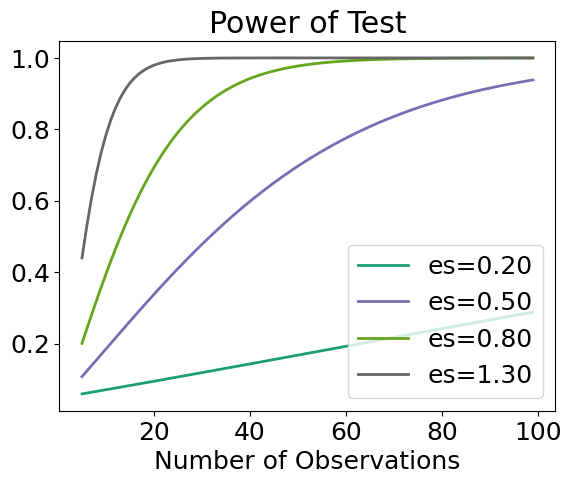

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import sqrt
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.power import TTestPower

# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD participants x and y position std.xlsx')
td_data = pd.read_excel('TD participants x and y position std.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Std_X_Position']
td=td_data['Std_X_Position']

#calculation of effect size
# size of samples in each groups
n1, n2 = 154, 223
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=120, effect_size = 0.14,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Std_X_Position for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Std_X_Position for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()


/var/folders/vk/zw9gkbl92b1d62br4mrx1ff00000gn/T/ipykernel_12051/3274884329.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
/var/folders/vk/zw9gkbl92b1d62br4mrx1ff00000gn/T/ipykernel_12051/3274884329.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


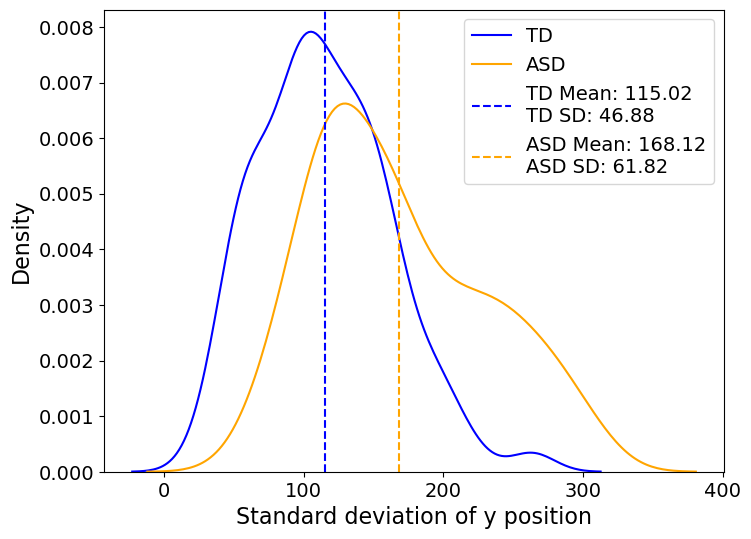

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Set the font size for the plot
rcParams['font.size'] = 18

# Load the two Excel files into Pandas dataframes
df_td = pd.read_excel('TD participants x and y position std.xlsx')
df_asd= pd.read_excel('ASD participants x and y position std.xlsx')

# Create a list of column names to compare
td_data = df_td['Std_Y_Position']
asd_data=df_asd['Std_Y_Position']

td_mean = td_data.mean()
td_std = td_data.std()
asd_mean = asd_data.mean()
asd_std = asd_data.std()

# Create a new plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as density plots
sns.kdeplot(td_data, label='TD', color='blue')
sns.kdeplot(asd_data, label='ASD', color='orange')

# Add vertical lines for the mean of each distribution
ax.axvline(td_mean, color='blue', linestyle='--', label=f'TD Mean: {td_mean:.2f}\nTD SD: {td_std:.2f}')
ax.axvline(asd_mean, color='orange', linestyle='--', label=f'ASD Mean: {asd_mean:.2f}\nASD SD: {asd_std:.2f}')

# Move the legend to the left side of the plot
ax.legend(loc='upper right', fontsize=14)

# Set the font size of the axis labels
ax.set_xlabel('Standard deviation of y position', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Save the plot as an image
plt.savefig('distributions.png', bbox_inches='tight')

# Show the plot
plt.show()

/var/folders/vk/zw9gkbl92b1d62br4mrx1ff00000gn/T/ipykernel_12051/1372914887.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
/var/folders/vk/zw9gkbl92b1d62br4mrx1ff00000gn/T/ipykernel_12051/1372914887.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)


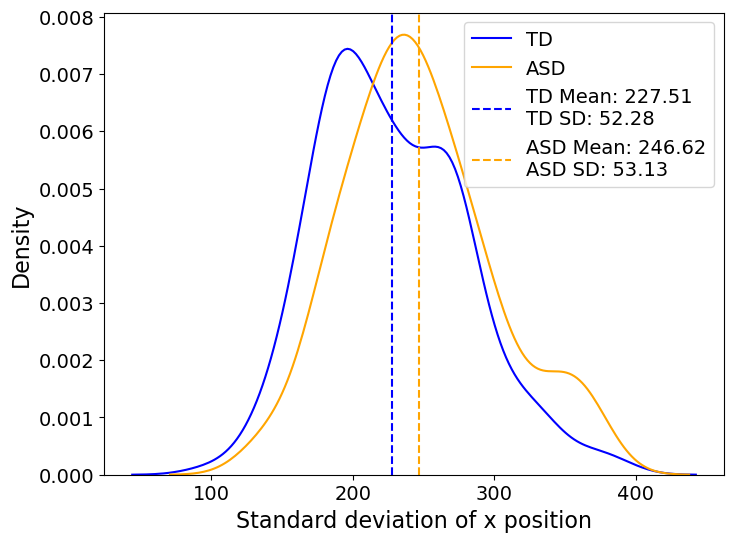

In [134]:

# Set the font size for the plot
rcParams['font.size'] = 18

# Load the two Excel files into Pandas dataframes
df_td = pd.read_excel('TD participants x and y position std.xlsx')
df_asd= pd.read_excel('ASD participants x and y position std.xlsx')

# Create a list of column names to compare
td_data = df_td['Std_X_Position']
asd_data=df_asd['Std_X_Position']

td_mean = td_data.mean()
td_std = td_data.std()
asd_mean = asd_data.mean()
asd_std = asd_data.std()

# Create a new plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data as density plots
sns.kdeplot(td_data, label='TD', color='blue')
sns.kdeplot(asd_data, label='ASD', color='orange')

# Add vertical lines for the mean of each distribution
ax.axvline(td_mean, color='blue', linestyle='--', label=f'TD Mean: {td_mean:.2f}\nTD SD: {td_std:.2f}')
ax.axvline(asd_mean, color='orange', linestyle='--', label=f'ASD Mean: {asd_mean:.2f}\nASD SD: {asd_std:.2f}')

# Move the legend to the left side of the plot
ax.legend(loc='upper right', fontsize=14)

# Set the font size of the axis labels
ax.set_xlabel('Standard deviation of x position', fontsize=16)
ax.set_ylabel('Density', fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

# Save the plot as an image
plt.savefig('distributions.png', bbox_inches='tight')

# Show the plot
plt.show()

Effect size: 0.9926228335608368
Sample size/Number needed in each group: 16.948
Power: 0.410
Confidence interval for Std_Y_Position for ASD participant: [158.306, 177.926]
Confidence interval for Std_Y_Position for TD participant: [159.976, 176.256]


/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/Users/maryamlotfigolian/opt/anaconda3/envs/Thesis/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


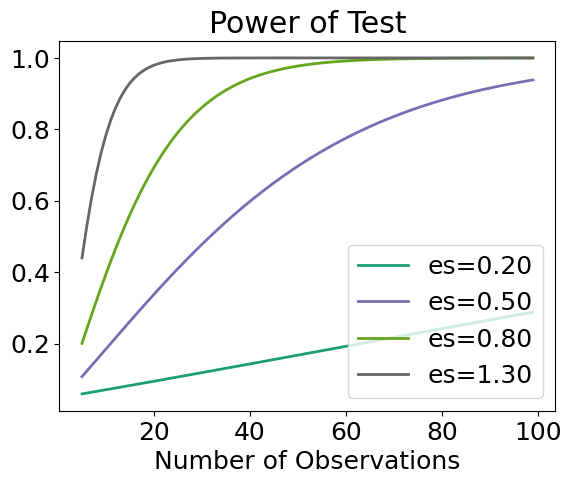

In [135]:
# Load the hidden Markov parameters for both groups
asd_data = pd.read_excel('ASD participants x and y position std.xlsx')
td_data = pd.read_excel('TD participants x and y position std.xlsx')
# Convert all values to numeric type, replace non-numeric values with NaN
#asd_data = asd_data.apply(pd.to_numeric, errors='coerce')
#td_data = td_data.apply(pd.to_numeric, errors='coerce')

asd= asd_data['Std_Y_Position']
td=td_data['Std_Y_Position']

#calculation of effect size
# size of samples in each groups
n1, n2 = 155, 224
  
# Calculate the mean and standard deviation of each group
asd_mean = asd.mean()
asd_std = asd.std()
td_mean = td.mean()
td_std = td.std()
  
# calculate the pooled standard deviation 
# (Cohen's d)
s = sqrt(((n1 - 1) * asd_std **2+ (n2 - 1) * td_std**2) / (n1 + n2 - 2))


# calculate the effect size
d = (asd_mean - td_mean) / s
print(f'Effect size: {d}')

# Set the significance level and power
alpha = 0.05
power = 0.8

# perform power analysis to find sample size 
# for given effect
obj = TTestIndPower()
n = obj.solve_power(effect_size=d, alpha=alpha, power=power, 
                    ratio=1, alternative='two-sided')


print('Sample size/Number needed in each group: {:.3f}'.format(n))

power = TTestPower()
n_test = power.solve_power(nobs=155, effect_size = 0.14,
                           power = None, alpha = 0.05)
print('Power: {:.3f}'.format(n_test))


# Calculate the confidence interval for ASD 
dof = n1-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n1)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Std_Y_Position for ASD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# Calculate the confidence interval for TD
dof = n2-1
confidence = 0.95
t_value = np.abs(t.ppf((1-confidence)/2,dof))
#t_value = 1.96 # for a 95% confidence level and df=165
se_mean = asd_std / sqrt(n2)
margin_error = t_value * se_mean
lower_bound = asd_mean - margin_error
upper_bound = asd_mean + margin_error
print(f'Confidence interval for Std_Y_Position for TD participant: [{lower_bound:.3f}, {upper_bound:.3f}]')

# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))
  
# plot power curves
obj = TTestIndPower()
obj.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()


Specificity :  0.8648648648648649
Sensitivity :  0.5897435897435898


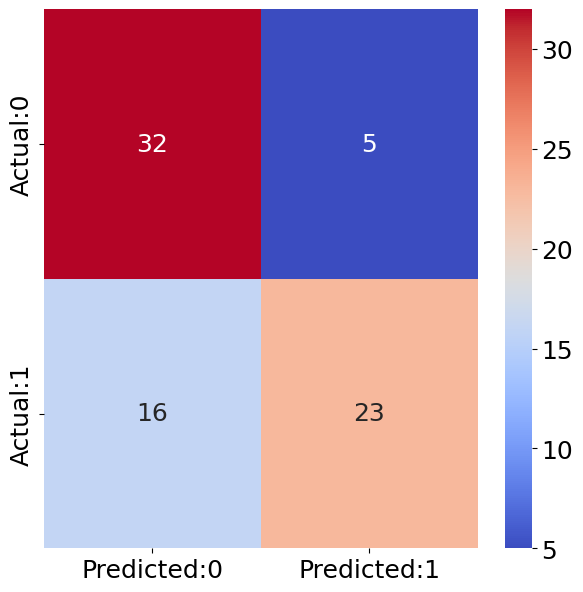

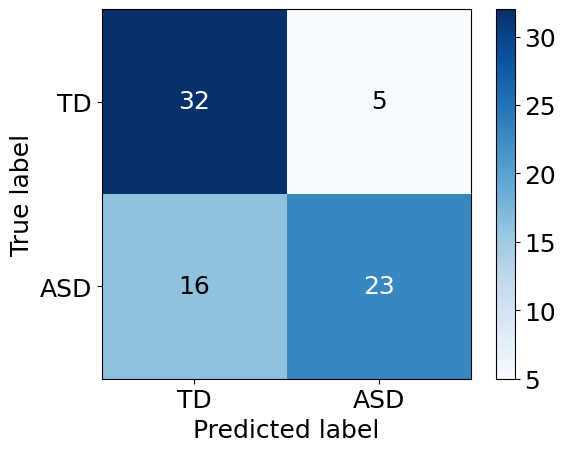

              precision    recall  f1-score   support

           0       0.67      0.86      0.75        37
           1       0.82      0.59      0.69        39

    accuracy                           0.72        76
   macro avg       0.74      0.73      0.72        76
weighted avg       0.75      0.72      0.72        76



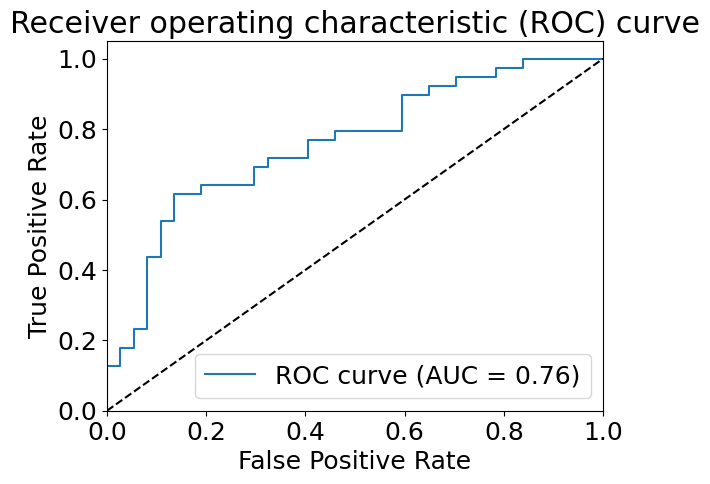

In [136]:
# Load the data from the Excel files
asd_df = pd.read_excel('ASD participants x and y position std.xlsx',engine='openpyxl')
td_df = pd.read_excel('TD participants x and y position std.xlsx',engine='openpyxl')

# Select the four relevant features and combine the ASD and TD data
features = ["Transition rate from saccade to fixation", "Transition rate from fixation to saccade", "Fixation velocities mean", "Fixation velocities standard deviation","Std_Y_Position"]
asd_data = asd_df[features]
td_data = td_df[features]
X = pd.concat([asd_data, td_data], axis=0)

# Create the target variable (ASD = 1, TD = 0)
y = [1]*asd_data.shape[0] + [0]*td_data.shape[0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data and evaluate the model
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,7))
cm=confusion_matrix(y_test, y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="coolwarm")
specificity= cm[0,0]/(cm[0,0]+cm[0,1])
print('Specificity : ', specificity)

sensitivity= cm[1,1]/(cm[1,0]+cm[1,1])
print('Sensitivity : ', sensitivity)

# Visualize the confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=[0,1], yticks=[0,1], xlabel='Predicted label', ylabel='True label')
ax.set_xticklabels(['TD', 'ASD'])
ax.set_yticklabels(['TD', 'ASD'])
for i in range(2):
    for j in range(2):
        ax.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
plt.show()

# Print the classification report
print(classification_report(y_test, y_pred))

# Calculate and plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [2]:
experim_max = 26
part_max = 60
data = []
separation_threshold = 0

for part in range(1,part_max):
    for exper in range(1,experim_max):
        try:
            df = pd.read_excel('/Users/maryamlotfigolian/Desktop/project papers/main/Eye-Tracking Dataset/ASD participant/'+str(part)+ ' ASD/E'+str(exper)+'('+str(part)+ ').xlsx',engine='openpyxl')
            df=df[df['Point of Regard Right X [px]'] !=0]
            df=df[df['Point of Regard Right Y [px]'] !=0]
            df= df[df['Category Right'].isin( ['Fixation', 'Saccade' ])]
            data.append(df)
            print('E'+str(exper)+'('+str(part)+ ')')
            separation_threshold +=1
        except FileNotFoundError:
            0
            
        try:
            df = pd.read_excel('/Users/maryamlotfigolian/Desktop/project papers/main/Eye-Tracking Dataset/TD participant/'+str(part)+ ' TD/E'+str(exper)+'('+str(part)+ ').xlsx',engine='openpyxl')
            df=df[df['Point of Regard Right X [px]'] !=0]
            df=df[df['Point of Regard Right Y [px]'] !=0]
            df= df[df['Category Right'].isin( ['Fixation', 'Saccade' ])]
            data.append(df)
            print('E'+str(exper)+'('+str(part)+ ')')
        except FileNotFoundError:
            0

E9(1)
E12(1)
E18(1)
E19(1)
E9(2)
E12(2)
E18(2)
E19(2)
E9(3)
E12(3)
E18(3)
E19(3)
E9(4)
E12(4)
E18(4)
E19(4)
E9(5)
E12(5)
E18(5)
E19(5)
E9(6)
E12(6)
E18(6)
E19(6)
E9(7)
E12(7)
E18(7)
E19(7)
E9(8)
E12(8)
E18(8)
E19(8)
E9(9)
E12(9)
E18(9)
E19(9)
E9(10)
E12(10)
E18(10)
E19(10)
E5(11)
E9(11)
E12(11)
E13(11)
E18(11)
E19(11)
E6(13)
E10(13)
E21(13)
E22(13)
E24(13)
E25(13)
E6(14)
E10(14)
E21(14)
E22(14)
E24(14)
E25(14)
E1(15)
E4(15)
E6(15)
E10(15)
E16(15)
E22(15)
E24(15)
E25(15)
E1(17)
E4(17)
E6(17)
E10(17)
E14(17)
E16(17)
E21(17)
E22(17)
E24(17)
E25(17)
E1(18)
E4(18)
E6(18)
E10(18)
E14(18)
E16(18)
E21(18)
E22(18)
E24(18)
E25(18)
E1(19)
E4(19)
E6(19)
E10(19)
E14(19)
E16(19)
E21(19)
E22(19)
E24(19)
E25(19)
E1(20)
E4(20)
E6(20)
E10(20)
E14(20)
E16(20)
E21(20)
E22(20)
E24(20)
E25(20)
E4(21)
E6(21)
E10(21)
E14(21)
E16(21)
E21(21)
E22(21)
E24(21)
E25(21)
E17(22)
E20(22)
E23(22)
E25(22)
E1(23)
E5(23)
E6(23)
E9(23)
E10(23)
E16(23)
E18(23)
E21(23)
E25(23)
E7(24)
E17(24)
E20(24)
E23(24)
E25(24)
E3(25)
E

In [ ]:
T = []
X = []
XX=[]
Y = []
YY=[]
T = []
TT = []
X = []
Y = []
d_X = []
d_Y = []
d_T = []
d_S = []
vS = []
vX = []
dX = []
dY = []
dS = []
dT = []
saccade = []
fixation=[]

separation_threshold2 = 0
for i in range(len(data)):
    if len(data[i])>300:
        if i<separation_threshold:
            separation_threshold2+=1
            
        
        temp_x = pd.to_numeric(data[i]['Point of Regard Right X [px]'])
        temp_y = pd.to_numeric(data[i]['Point of Regard Right X [px]'])
        temp_tt = pd.to_numeric(data[i]['RecordingTime [ms]'])
        temp_dtt = np.diff(temp_tt)
        
        distance = (temp_x**2 + temp_y**2)**0.5
        points_to_keep = distance > 25
        
        TT.append(pd.to_numeric(data[i]['RecordingTime [ms]'], errors='coerce')[points_to_keep]) 
        XX.append(pd.to_numeric(data[i]['Point of Regard Right X [px]'][points_to_keep], errors='coerce')) 
        YY.append(pd.to_numeric(data[i]['Point of Regard Right Y [px]'][points_to_keep], errors='coerce')) 
        saccade.append(np.array(data[i]['Category Right'][points_to_keep])=='Saccade')
        fixation.append(np.array(data[i]['Category Right'][points_to_keep])=='Fixation')
    
        d_X.append(np.diff(XX[-1]))
        d_Y.append(np.diff(YY[-1]))
        d_T.append(np.diff(TT[-1]))
        d_S.append(np.sqrt(np.diff(XX[-1])**2 + np.diff(YY[-1])**2))
        
        dX = d_X
        dY = d_Y
        dS = d_S
        dT = d_T
        
        vX_loc = np.diff(XX[-1])/ np.diff(TT[-1])
        vX.append( vX_loc[~np.isnan(vX_loc)] )
        
        vs_loc = np.sqrt(np.diff(XX[-1])**2 + np.diff(YY[-1])**2) / np.diff(TT[-1])
        vS.append( vs_loc[~np.isnan(vs_loc)] )

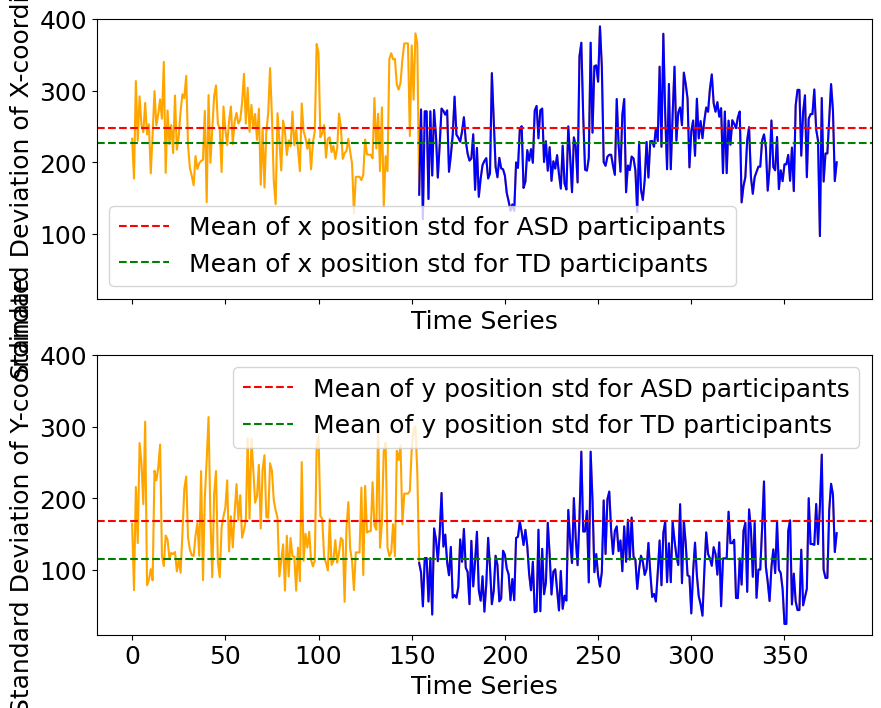

Mean std of Y before threshold 154 (ASD participants): 168.49
Mean std of Y after threshold 154 (TD participants): 114.99
Mean std of X before threshold 154 (ASD participants): 247.22
Mean std of X after threshold 154 (TD participants): 227.19


In [138]:
lX = []
lY = []
for i in range(len(XX)):
    if len(XX[i]) > 0:
        lX.append(np.std(XX[i]))
        lY.append(np.std(YY[i]))

mean_std_y_before = np.mean(lY[:separation_threshold2])
mean_std_y_after = np.mean(lY[separation_threshold2:])
mean_std_x_before = np.mean(lX[:separation_threshold2])
mean_std_x_after = np.mean(lX[separation_threshold2:])

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True)

# plot for X-coordinate
ax1.plot(range(len(lX)), lX, color='orange')
ax1.plot(range(separation_threshold2, len(lX)), lX[separation_threshold2:], color='blue')
ax1.axhline(y=mean_std_x_before, color='r', linestyle='--', label='Mean of x position std for ASD participants')
ax1.axhline(y=mean_std_x_after, color='g', linestyle='--', label='Mean of x position std for TD participants')
ax1.set_ylabel('Standard Deviation of X-coordinate')
ax1.set_xlabel('Time Series')
ax1.set_ylim(10,400)
ax1.legend()

# plot for Y-coordinate
ax2.plot(range(len(lY)), lY, color='orange')
ax2.plot(range(separation_threshold2, len(lY)), lY[separation_threshold2:], color='blue')
ax2.axhline(y=mean_std_y_before, color='r', linestyle='--', label='Mean of y position std for ASD participants')
ax2.axhline(y=mean_std_y_after, color='g', linestyle='--', label='Mean of y position std for TD participants')
ax2.set_ylabel('Standard Deviation of Y-coordinate')
ax2.set_xlabel('Time Series')
ax2.set_ylim(10,400)
ax2.legend()

plt.show()

print(f"Mean std of Y before threshold 154 (ASD participants): {mean_std_y_before:.2f}")
print(f"Mean std of Y after threshold 154 (TD participants): {mean_std_y_after:.2f}")
print(f"Mean std of X before threshold 154 (ASD participants): {mean_std_x_before:.2f}")
print(f"Mean std of X after threshold 154 (TD participants): {mean_std_x_after:.2f}")

